In [36]:
#!/usr/bin/env python

'''

__author__ = "Bijan Vafaei"
__copyright__ = "Copyright 2019"
__credits__ = 
__license__ = 
__version__ = "1.0.2"
__maintainer__ = 
__email__ = "bvafaei@epsteinglobal.com"
__status__ = "Prototype"

'''

# Importing required libraries

import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from scipy import stats


In [37]:
df = pd.DataFrame(data = pd.read_csv('data/chart2000-songmonth-0-3-0054.csv' , na_values= '-'))
df.tail(5)

,month,position,artist,song,score,us,uk,de,fr,ca,au
11695,Jun 2019,46,Meduza & Goodboys,Piece Of Your Heart,763.855,NaN,6.0,12.0,86.0,NaN,11.0
11696,Jun 2019,47,Taylor Swift,You Need To Calm Down,748.374,2.0,5.0,36.0,154.0,4.0,3.0
11697,Jun 2019,48,Thomas Rhett,Look What God Gave Her,739.890,37.0,NaN,NaN,NaN,33.0,NaN
11698,Jun 2019,49,Calboy,Envy Me,732.388,38.0,NaN,NaN,NaN,59.0,NaN
11699,Jun 2019,50,Kane Brown,Good As You,728.173,36.0,NaN,NaN,NaN,62.0,NaN


In [38]:
round(df.describe(include='all'),2)

,month,position,artist,song,score,us,uk,de,fr,ca,au
count,11700,11700.00,11700,11700,11700.00,10813.00,6667.00,6149.00,5062.00,5708.00,5771.00
unique,234,NaN,1721,2964,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Nov 2015,NaN,Rihanna,Perfect,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,50,NaN,123,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,25.50,NaN,NaN,1366.74,20.96,29.37,28.45,44.40,19.18,18.16
std,NaN,14.43,NaN,NaN,710.30,17.15,25.31,25.60,44.76,14.85,14.03
min,NaN,1.00,NaN,NaN,343.30,1.00,1.00,1.00,1.00,1.00,1.00
25%,NaN,13.00,NaN,NaN,837.42,8.00,8.00,7.00,11.00,7.00,6.00
50%,NaN,25.50,NaN,NaN,1225.76,17.00,22.00,21.00,29.00,16.00,15.00
75%,NaN,38.00,NaN,NaN,1688.24,29.00,44.00,44.00,63.00,28.00,29.00


In [39]:
df.isnull().sum()

month          0
position       0
artist         0
song           0
score          0
us           887
uk          5033
de          5551
fr          6638
ca          5992
au          5929
dtype: int64

In [40]:
df.dtypes

month        object
position      int64
artist       object
song         object
score       float64
us          float64
uk          float64
de          float64
fr          float64
ca          float64
au          float64
dtype: object

In [6]:
#functions

In [41]:
def unique_value(df, arg):
    return df[arg].unique()

In [42]:
def filter_col(df, cols):
    return df.filter( items= cols)

In [43]:
def filter_value(df, **kwargs):
    if kwargs is not None:
        filtered_df = df
        for key, value in kwargs.items():
            filtered_df = filtered_df[filtered_df[key] == value]
    return filtered_df

In [44]:
def agg(df, groupby_cols, count_cols, **kwargs):
    if ('method' in kwargs) & (kwargs['method'] == 'sum'):
            df_agg = df.groupby(groupby_cols)[count_cols].agg(pd.Series.sum).reset_index()
    else:
        df_agg = df.groupby(groupby_cols)[count_cols].agg(pd.Series.count).reset_index()

    return df_agg

In [45]:
# Questions

In [46]:
# Q1)
# a) How many unique artists are represented in the charts?
# b) How many unique songs are represented?

def q1(df, *args):
    arg_num =     [len(unique_value(df, arg).tolist()) for arg in args ] 
    return arg_num


q1(df, 'artist', 'song')

[1721, 2964]

In [47]:
# Q2)
# a) What song has the highest one-month score of all time?
# b) What month was this?
# c) Who was the artist?


def q2(df):
    max_score = df['score'].max()
    chart_max_score = filter_value(df, score = max_score)
    return filter_col(chart_max_score, ['song','month', 'artist', 'score', 'position'])

q2(df)

,song,month,artist,score,position
2550,Yeah!,Apr 2004,"Usher, Lil' Jon & Ludacris",5524.53,1


In [48]:
# 3) As I am writing this, I am listening to the song “Safe and Sound” by Capital Cities.
# a) How many months was this song on the charts in the United States?
# b) What was its peak US chart position?
# c) In what month did it achieve this peak US chart position?


def q3(df, **kwargs): 
    fav_song = filter_value(df, **kwargs ).reset_index()
    months_on_chart_US = len(fav_song['month'].tolist())
    best_position_US = fav_song['us'].min()
    best_month_US = fav_song.iloc[fav_song['us'].idxmin()]['month']
    return months_on_chart_US, best_position_US , best_month_US

q3(df, song = 'Safe And Sound', artist = 'Capital Cities')

(10, 8.0, 'Sep 2013')

In [49]:
# 4)
# a) Which artist has spent the most time on the charts as defined by chart-months?
# b) How many chart-months have they scored?

def q4(df):
    agg_df_artist = agg(df, 'artist', 'month' , method = 'count')
    artist_most_time_on_chart = agg_df_artist['artist'].iloc[agg_df_artist['month'].idxmax()]
    most_time_on_chart = agg_df_artist['month'].iloc[agg_df_artist['month'].idxmax()]
    return artist_most_time_on_chart , most_time_on_chart

q4(df)

('Rihanna', 123)

In [50]:
#Alternative Solution for Q4
agg_df_artist = agg(df, 'artist', 'month' , method = 'count')
max_num_months = agg_df_artist['month'].max()
artist_most_time_on_chart = filter_value(agg_df_artist, month = max_num_months)
artist_most_time_on_chart

,artist,month
1322,Rihanna,123


In [51]:
# More details on top artists who spent most time on the charts
agg_df_artist.sort_values('month', ascending = False).head()

,artist,month
1322,Rihanna,123
1501,Taylor Swift,109
1247,Pink,107
814,Katy Perry,93
1516,The Black Eyed Peas,87


In [52]:
# 5) How many #1 hits does Drake have in Canada?

def q5(df, **kwargs):
    return filter_value(df, **kwargs)['month'].count()

hit = 1
q5(df, artist = 'Drake', ca = hit)

10

In [53]:
# 6) Which Lady Gaga song on the list did not chart in Australia?

def q6( df, **kwargs):
    df_target_artist = filter_value(df, artist = kwargs['artist'])
    agg_df = agg(df_target_artist, 'song' , kwargs['country'] , method = 'count')
    song_list = agg_df[agg_df[kwargs['country']] == kwargs['countryhit']]
    return  song_list
    

nohit = 0
artist_name = 'Lady GaGa'
q6(df , artist = artist_name , country = 'au' ,  countryhit = nohit)

,song,au
7,Marry The Night,0.0


In [54]:
def q6(df, **kwargs): 
    df_target_artist = filter_value(df, artist = kwargs['artist'])
    agg_df_q6 = agg(df_target_artist, 'song' , kwargs['country'] , method = 'count')
    song_list = agg_df_q6[agg_df_q6[kwargs['country']] == kwargs['countryhit']]
    return  song_list 

nohit = 0
artist_name = 'Lady GaGa'
q6(df, artist = artist_name , country = 'au' ,  countryhit = nohit)

,song,au
7,Marry The Night,0.0


In [55]:
#Another Solution for q6

agg_df_q6 = agg(df, ['artist', 'song'], 'au', method = 'count')
filter_value(agg_df_q6, artist = 'Lady GaGa')

,artist,song,au
1614,Lady GaGa,Alejandro,4.0
1615,Lady GaGa,Always Remember Us This Way,1.0
1616,Lady GaGa,Applause,2.0
1617,Lady GaGa,Bad Romance,8.0
1618,Lady GaGa,Born This Way,6.0
1619,Lady GaGa,Judas,2.0
1620,Lady GaGa,LoveGame,4.0
1621,Lady GaGa,Marry The Night,0.0
1622,Lady GaGa,Million Reasons,1.0
1623,Lady GaGa,Paparazzi,3.0


In [56]:
# 7)
# a) In what month of her career did Ariana Grande have her highest-ever number of songs
# on the charts?
# b) In this month, how many songs did she chart?
# c) What were these songs ranked in the US, and which was the highest?

def q7(df, artist_name):
    agg_df_artist_month = agg(filter_value(df, artist = artist_name),'month','song', method = 'count')
    max_num_songs = agg_df_artist_month['song'].max()
    artist_best_month = filter_value(agg_df_artist_month, song = max_num_songs)['month'].tolist()
    artist_metrics = filter_col(filter_value(df , month = artist_best_month[0], artist = artist_name), ['month' , 'artist' , 'song' , 'us']).reset_index(drop=True).sort_values('us')
    return artist_metrics
    
artist_name = 'Ariana Grande'
q7(df, artist_name)

,month,artist,song,us
0,Feb 2019,Ariana Grande,7 Rings,1.0
2,Feb 2019,Ariana Grande,"Break Up With Your Girlfriend, I'm",2.0
1,Feb 2019,Ariana Grande,"Thank U, Next",3.0
3,Feb 2019,Ariana Grande,Breathin,18.0


In [57]:
# More details on Q7
agg_df_artist_month = agg(filter_value(df, artist = artist_name),'month','song', method = 'count')
agg_df_artist_month.sort_values('song', ascending = False).head()

,month,song
11,Feb 2019,4
34,Oct 2018,3
24,Mar 2019,3
14,Jan 2019,3
32,Nov 2018,3


In [58]:
# 8)
# a) Which ten artists had the most unique songs make the charts between 2013 and 2017?
# b) Make a bar graph that includes each artist and how many songs they charted. Please
# label, title, and color your graph appropriately.

def q8(df, start_date, end_date):
    df_filtered = filter_col(df, ['month', 'song', 'artist'])
    df_filtered['month'] = pd.to_datetime(df_filtered['month'], format = '%b %Y')
    mask = (df_filtered['month'] >= start_date) & (df_filtered['month'] <= end_date)
    df_yr = df_filtered[ mask ]
    df_yr_agg = df_yr.groupby(['artist']).agg('nunique').sort_values('song', ascending = False)['song'].to_frame().reset_index().head(10)
    return df_yr_agg


start_date = 'Jan 2013'
end_date = 'Dec 2017'
q8(df, start_date, end_date)

,artist,song
0,Ed Sheeran,11
1,Taylor Swift,10
2,One Direction,10
3,Bruno Mars,8
4,Drake,8
5,Rihanna,8
6,Selena Gomez,7
7,Maroon 5,7
8,Florida Georgia Line,7
9,Avicii,7


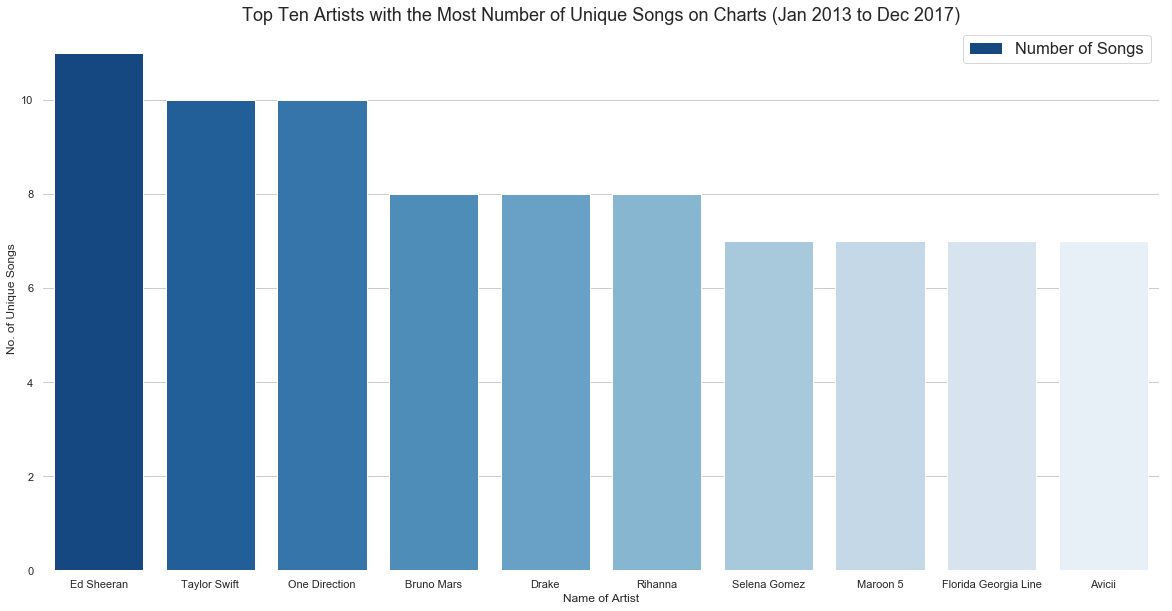

In [59]:
def q8_plot(df, graph_title, *args):
    #Creating Bar Graph
    sns.set(style="whitegrid")

    # Initialize the figure
    f, ax = plt.subplots(figsize=(20, 10))
    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
    ax = sns.barplot(x = args[0] , y = args[1] , data = df , label = "Number of Songs", palette="Blues_r", color="b" , saturation=0.8)
    ax.set_title(graph_title)
    ax.set(xlabel='Name of Artist', ylabel='No. of Unique Songs')

    # Add a legend and informative axis label
    ax.legend(ncol=2, loc="upper right", frameon=True)
    sns.despine(left=True, bottom=True)
    return plt.show()


graph_title = "Top Ten Artists with the Most Number of Unique Songs on Charts ({date})".format(date = str(start_date)  + ' to ' + str(end_date)) 
df_yr_agg = q8(df, start_date, end_date)
q8_plot(df_yr_agg, graph_title, 'artist', 'song')

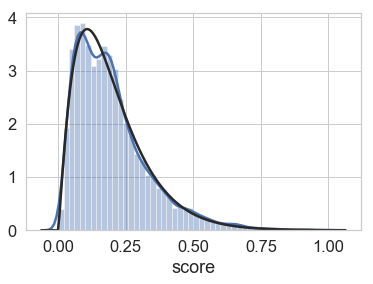

In [60]:
x= df['score']
df_n = df
# Normalization to using Min-Max Scaler
df_n['score'] = (x-x.min())/(x.max()-x.min())

# using seaborn and stats to plot the distribution and test 
sns.distplot(x, kde=True, fit=stats.gamma)